# Airbnb 가격 예측하기

- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적 : 가격 예측(price)
- 제공 데이터(3개) : train_csv, test_csv, y_test(최종 채점용)
- 평가 방식 : MSE

___
lms의 baseline에서는 mse가 51xxx.점이 나왔다. baseline score보다 점수를 낮춰보자!

## 1. 데이터셋

In [1]:
# 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

## 2. EDA (탐색적 데이터 분석)

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# train 데이터 샘플
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


- train data에는 price가 추가된 것을 알 수 있다.

In [5]:
# test 데이터 샘플
test.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246


In [6]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [7]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [8]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
a= train.isnull().value_counts()
pd.DataFrame(a)

0
id    name  host_id host_name neighbourhood_group neighbourhood latitude longitude room_type price minimum_nights number_of_reviews last_review reviews_per_month calculated_host_listings_count availability_365       
False False False   False     False               False         False    False     False     False False          False             False       False             False                          False             31103
                                                                                                                                    True        True              False                          False              7984
                    True      False               False         False    False     False     False False          False             False       False             False                          False                13
      True  False   False     False               False         False    False     False     False False          False             False       False             False                          False                 6
                                                                                                                                    True        True              False                          False                 6
      False False   True      False               False         False    False     False     False False          False             True        True              False                          False                 4

- name과 host_name은 서로 별개의 결측치를 보이고 last_review와 reviews_per_month는 같은 행에서의 결측치를 보이는 것을 알 수 있다.
- name/host_name/last_review&reviews_per_month : FFF(31103)/FFT(7984)/FTF(13)/FTT(6)/TFF(6)/TFT(6)
- last_review와 reviews_per_month는 실제로 작성하지 않는 사람이 많아 결측치는 채워줘도 될 것 같다
- name, host_name의 결측치가 전체 데이터의 많은 부분을 차지하지 않음

In [10]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [11]:
b= test.isnull().value_counts()
pd.DataFrame(b)

0
id    name  host_id host_name neighbourhood_group neighbourhood latitude longitude room_type minimum_nights number_of_reviews last_review reviews_per_month calculated_host_listings_count availability_365      
False False False   False     False               False         False    False     False     False          False             False       False             False                          False             7718
                                                                                                                              True        True              False                          False             2053
      True  False   False     False               False         False    False     False     False          False             True        True              False                          False                4
      False False   True      False               False         False    False     False     False          False             False       False             False                          False                3
                                                                                                                              True        True              False                          False                1

- test도 train과 동일하게 last_review와 reviews_per_month의 결측치는 함께 발생했다.
- name/host_name/last_review&reviews_per_month :FFF(7718)/FFT(2053)/FTF(3)/FTT(1)/TFT(4)
- test 데이터에서는 train과 달리 TFF가 존재하지 않았다.


<AxesSubplot:>

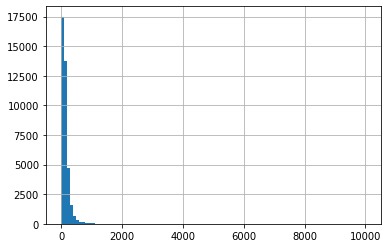

In [12]:
# target(hist)
train['price'].hist(bins=100)

In [13]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- price가 0인 방이 있다고 되어있다.

In [14]:
# price가 0인 정보 확인

train[train['price']==0].value_counts().sum()

9

- price가 0인 값은 총 9개가 있다는 것을 알 수 있다.
- price가 0인 값은 이상치로 보고 제거해도 될 것 같다.

In [15]:
# 피처(host_id) - 중복된 값이 있는지 확인하기
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

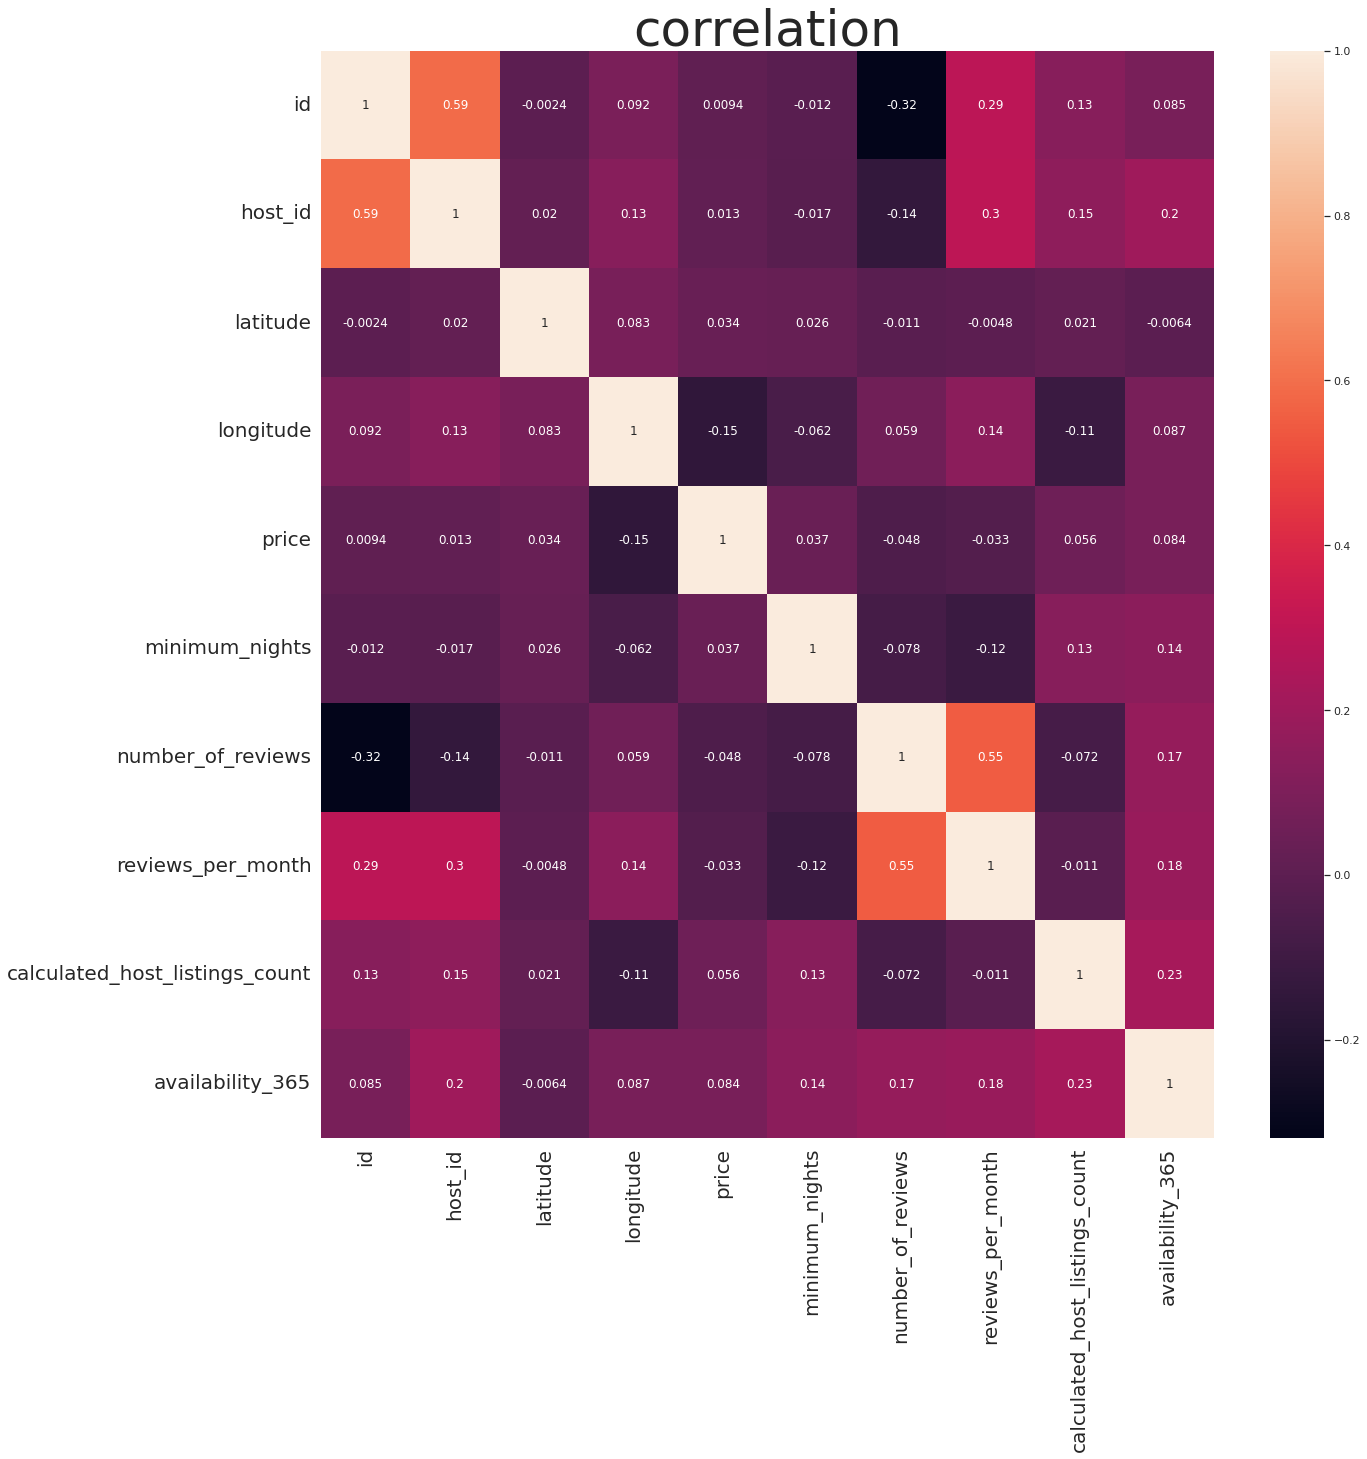

In [16]:
sns.set(rc = {'figure.figsize':(20,20)})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.heatmap(train.corr(), annot=True)
plt.title("correlation", fontsize = 50)
plt.show()

'price'와 다른 column간의 상관관계를 알고 싶어 히트맵을 만들어봤다. 

수치형 데이터로만 집계되었는데, price는 그 중 availability_365, calculate_host_listings_count 순으로 높은 상관관계를 나타냈고, longtitude와 가장 낮은 상관관계를 보였다.

## 3. 데이터 전처리

1. 결측치 제거 - host_name, name의 열을 제거 & 리뷰 결측치 채우기
2. 결측치 제거 - host_name, name의 열을 제거 & 리뷰 행 제거
____

- name과 host_name은 id라는 고유한 정보가 있기 때문에 중요한 정보가 아닐 것이라고 판단했다. 따라서 name과 host_name 컬럼을 지우고 리뷰에 대한 전처리를 어떤 방식으로 하는 것이 더 좋을 것인지 판단하기 위해 두가지로 나누어 진행하였다.

- 그 전에 price가 0인 값은 지워주기로 한다.

In [17]:
# 이상치 삭제하기
train = train[train['price']!=0]
train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Jessie,Manhattan,Financial District,40.71035,-74.00734,Entire home/apt,185,30,0,NaN,NaN,2,346
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Shared Stay-JFK The Hugh Suite,Queens,Springfield Gardens,40.66102,-73.77035,Private room,50,1,57,2019-06-21,7.28,3,342
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Tola,Manhattan,Upper East Side,40.77693,-73.94524,Entire home/apt,120,7,0,NaN,NaN,1,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Alexandra,Manhattan,Greenwich Village,40.73110,-73.99913,Entire home/apt,165,30,19,2018-10-15,0.23,1,259


In [18]:
# price가 0인값을 제거한 데이터의 결측치를 다시 확인한다.

train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

price가 0인 값을 삭제해도 위에서 찾은 결측치와 상관이 없기에 예정대로 진행한다.

In [19]:
#1. name, host_name 열 삭제하기

train_1 = train.drop(['name','host_name'], axis=1)
test_1 = test.drop(['name','host_name'], axis=1)

In [20]:
# 결측치 컬럼 삭제 (last_review) - %값으로 되어 있어서 채우기 어려울 것 같으므로
train_1 = train_1.drop('last_review', axis=1)
test_1 = test_1.drop('last_review', axis=1)

In [21]:
# 결측치 채우기
train_1['reviews_per_month'] = train_1['reviews_per_month'].fillna(0)
test_1['reviews_per_month'] = test_1['reviews_per_month'].fillna(0)

- name과 host_name 컬럼을 삭제한 데이터에서는 결측치를 어떻게 처리하는 게 좋을지 확인하기 위해 lms와 동일하게 채우기 어려운 last_review 컬럼은 삭제하고 review_per_month는 0으로 채워주었다.
- 각 전처리마다의 결과값을 확인하기 위해 새로운 변수를 지정하였다.

In [22]:
train_1.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

결측치가 모두 사라진 것을 확인할 수 있다.

In [23]:
#2. name, host_name 열 동일하게 삭제하기

train_2 = train.drop(['name','host_name'], axis=1)
test_2 = test.drop(['name','host_name'], axis=1)

In [24]:
# 2. 결측치 행 제거(last_review,reviews_per_month)
train_2 = train_2.dropna(subset = ['last_review'])
test_2 = test_2.dropna(subset = ['last_review'])

In [25]:
train_2.reset_index(drop=True)
test_2.reset_index(drop=True)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,33771081,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,5308961,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,319077,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,1931990,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,78325795,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7716,32180213,198730633,Manhattan,Harlem,40.81105,-73.95241,Private room,1,3,2019-03-17,0.71,2,0
7717,16024539,1622733,Brooklyn,Greenpoint,40.72413,-73.95090,Entire home/apt,2,14,2019-06-08,0.70,1,93
7718,35235326,96659533,Brooklyn,Bushwick,40.69447,-73.91364,Private room,2,5,2019-07-02,4.17,2,301
7719,33471805,252191305,Queens,Cambria Heights,40.69090,-73.73193,Private room,1,34,2019-06-30,11.21,1,61


- 위 데이터 탐색에서 last_review, reviews_per_month의 결측치가 같은 행이란 것을 확인했으므로 이 행들을 삭제해준다.

In [26]:
# 결측치 확인
train_2.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
test_2.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [28]:
# 가격 값 복사
target_1 = train_1['price']
train_1 = train_1.drop('price', axis=1)

target_2 = train_2['price']
train_2 = train_2.drop('price', axis=1)

In [29]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

In [30]:
## train 과 test를 동일하게 대입해 주어야 함
train_1 = train_1[cols]
test_1 = test_1[cols]

train_2 = train_2[cols]
test_2 = test_2[cols]

## 4. 검증 데이터 분리

In [31]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(train_1, target_1, test_size=0.2, random_state=2022)
X_train_1.shape, X_val_1.shape, y_train_1.shape, y_val_1.shape

((31285, 8), (7822, 8), (31285,), (7822,))

In [32]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(train_2, target_2, test_size=0.2, random_state=2022)
X_train_2.shape, X_val_2.shape, y_train_2.shape, y_val_2.shape

((24890, 8), (6223, 8), (24890,), (6223,))

## 5. 머신러닝

첫번째 데이터를 먼저 살펴보자.

In [33]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_LR = LinearRegression()
model_LR.fit(X_train_1, y_train_1)
pred = model_LR.predict(X_val_1)
mean_squared_error(y_val_1, pred)

64931.106430377884

In [34]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model_R = Ridge()
model_R.fit(X_train_1, y_train_1)
pred = model_R.predict(X_val_1)
mean_squared_error(y_val_1, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.10877e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


64935.32868265513

In [35]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model_L = Lasso()
model_L.fit(X_train_1, y_train_1)
pred = model_L.predict(X_val_1)
mean_squared_error(y_val_1, pred)

65681.68119038227

In [36]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model_EN = ElasticNet()
model_EN.fit(X_train_1, y_train_1)
pred = model_EN.predict(X_val_1)
mean_squared_error(y_val_1, pred)

66511.00195151783

In [37]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(random_state=2022)
model_RFR.fit(X_train_1, y_train_1)
pred = model_RFR.predict(X_val_1)
mean_squared_error(y_val_1, pred)

57546.24406079008

In [38]:
# Xgboost
from xgboost import XGBRegressor

model_XGBR = XGBRegressor(random_state=2022)
model_XGBR.fit(X_train_1, y_train_1)
pred = model_XGBR.predict(X_val_1)
mean_squared_error(y_val_1, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


62622.80744525614

- 첫번째 데이터는 lms와 비교했을 때 name과 host_name의 컬럼을 삭제했다는 것 외에 다른 점은 없었는데 놀랍게도 결과가 2배로 나빠졌다.

- name과 host_name이 중요하지 않은 정보라고 생각했지만 두 컬럼은 모델 학습에 유용한 정보를 제공하는 컬럼이었다는 것을 알 수 있다.

- 첫번째 데이터에서는 랜덤 포레스트가 가장 좋은 성능을 보여준다.

이번엔 두 번째 데이터를 확인해보자.

In [46]:
# 머신러닝(회귀)

model_LR = LinearRegression()
model_LR.fit(X_train_2, y_train_2)
pred = model_LR.predict(X_val_2)
mean_squared_error(y_val_2, pred)

24026.70083484859

In [47]:
# 릿지 회귀

model_R = Ridge()
model_R.fit(X_train_2, y_train_2)
pred = model_R.predict(X_val_2)
mean_squared_error(y_val_2, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.31318e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


24025.58593040746

In [48]:
# 라쏘 회귀

model_L = Lasso()
model_L.fit(X_train_2, y_train_2)
pred = model_L.predict(X_val_2)
mean_squared_error(y_val_2, pred)

24606.37337271753

In [49]:
# 엘라스틱넷 회귀

model_EN = ElasticNet()
model_EN.fit(X_train_2, y_train_2)
pred = model_EN.predict(X_val_2)
mean_squared_error(y_val_2, pred)

25124.306461808825

In [50]:
# 랜덤포레스트

model_RFR = RandomForestRegressor(random_state=2022)
model_RFR.fit(X_train_2, y_train_2)
pred = model_RFR.predict(X_val_2)
mean_squared_error(y_val_2, pred)

25452.827255664466

In [51]:
# Xgboost

model_XGBR = XGBRegressor(random_state=2022)
model_XGBR.fit(X_train_2, y_train_2)
pred = model_XGBR.predict(X_val_2)
mean_squared_error(y_val_2, pred)

37705.93065619856

- 첫 번째 데이터보다 각 모델들의 성능이 모두 좋아진 것을 확인할 수 있다.

- 이번 데이터에서는 릿지 회귀가 가장 좋은 성능을 보여주는 모델이라는 것을 알 수 있다.

## 6. 평가

mse 방법으로 평가해보자

In [39]:
# test 데이터 예측 및 평가
y_test_1 = pd.read_csv('/aiffel/data/y_test.csv')

In [40]:
# LinearRegression
pred = model_LR.predict(test_1)
mean_squared_error(y_test_1, pred)

52609.3541713162

In [41]:
# 릿지 회귀
pred = model_R.predict(test_1)
mean_squared_error(y_test_1, pred)

52609.79172959345

In [42]:
# 라쏘 회귀
pred = model_L.predict(test_1)
mean_squared_error(y_test_1, pred)

53193.77683500041

In [43]:
# 엘라스텍넷 회귀
pred = model_EN.predict(test_1)
mean_squared_error(y_test_1, pred)

53916.06286889384

In [44]:
# 랜덤포레스트
pred = model_RFR.predict(test_1)
mean_squared_error(y_test_1, pred)

49790.6295350138

In [45]:
# xgboost
pred = model_XGBR.predict(test_1)
mean_squared_error(y_test_1, pred)

48423.305637618316

- 크게 차이는 안나지만 오히려 채점용 데이터에서는 mse가 더 좋아진 것을 알 수 있다.

- 첫번째 데이터에 대해서는 xgboost가 48xxx로 가장 좋은 성능을 보여주는 모델인 것을 확인할 수 있다.

___
두번째 데이터를 평가하기 전에 y_test의 데이터 량을 확인한다.

In [52]:
# test 데이터 예측 및 평가
y_test_2 = pd.read_csv('/aiffel/data/y_test.csv')

In [53]:
test_2.shape, y_test_2.shape

((7721, 8), (9779, 1))

- test_2의 데이터 값과 y_test의 데이터 수가 다르다는 것을 알 수 있다.
  평가를 위해 y_test의 데이터 량을 test와 같이 맞춰준다.

In [54]:
random_indices = np.random.choice(y_test_2.index, size=2058, replace=False)
y_test_2 = y_test_2.drop(random_indices).reset_index(drop = 'True')
y_test_2

,price
0,80
1,190
2,500
3,129
4,142
...,...
7716,75
7717,70
7718,50
7719,50


- y_test_2의 데이터 행을 랜덤으로 삭제하여 데이터 수를 맞춰주었다.

In [55]:
test_2.shape, y_test_2.shape

((7721, 8), (7721, 1))

In [56]:
# LinearRegression
pred = model_LR.predict(test_1)
mean_squared_error(y_test_1, pred)

52689.4939990235

In [57]:
# 릿지 회귀
pred = model_R.predict(test_1)
mean_squared_error(y_test_1, pred)

52695.614234075445

In [58]:
# 라쏘 회귀
pred = model_L.predict(test_1)
mean_squared_error(y_test_1, pred)

53465.62946641143

In [59]:
# 엘라스텍넷 회귀
pred = model_EN.predict(test_1)
mean_squared_error(y_test_1, pred)

53999.61262383261

In [60]:
# 랜덤포레스트
pred = model_RFR.predict(test_1)
mean_squared_error(y_test_1, pred)

61490.56761933736

In [61]:
# xgboost
pred = model_XGBR.predict(test_1)
mean_squared_error(y_test_1, pred)

92083.42899600203

- last_review와 rivew_per_month의 결측치 행들을 삭제했을 때 train, val로 성능을 보았을 때는 첫 번째보다 더 좋은 결과가 나왔지만 다른 데이터에 대한 성능을 확인해보면 오히려 ast_review와 rivew_per_month의 결측치 행들을 삭제한 데이터의 성능이 더 떨어진다는 것을 알 수 있다.

## 7. 결론

- 데이터 전처리 부분에서는 컬럼들을 함부로 삭제하는 것은 성능 향상에 좋지 못하다는 것을 알 수 있다. host_name과 name은 맨 처음 예측대로 다른 데이터들에 적용할 때 큰 영향을 주지 않는 정보라고 보여진다.
- 위 데이터에서 가장 좋은 성능을 보여준 머신러닝 모델을 XGBoost였다. 

## 8. 막혔던 부분

1. hitmap
- 컬럼들의 상관관계를 알 수 있는 그래프를 그리고 싶어서 처음에 산점도로 해야할 지 히트맵을 해야할 지 헤맸던 것 같다. 그래프에 대한 이해가 아직도 덜 되었었구나를 알 수 있었고 히트맵을 만들어보면서 복습이 되어 좋았다.하지만 히트맵으로 얻은 정보를 쓰진 못해서 아쉬움이 남는다. 앞으로 필요한 정보를 찾아내는 능력을 더 길러야겠다. 


2. 데이터 행을 랜덤으로 삭제하기
- 결측치 행들을 삭제해서 데이터량이 맞지 않는 문제가 생겼었다. 데이터를 맞춰줘야 하는 것은 알겠는데 랜덤으로 어떻게 삭제해야 할 지 고민하다가 구글링을 통해 답을 얻게 되었다. 나는 랜덤으로 값들을 삭제하는 작업을 해주었는데, 다음에는 랜덤으로 선택하여 남기는 방법을 사용해도 될 것 같다.

3. 오류처리
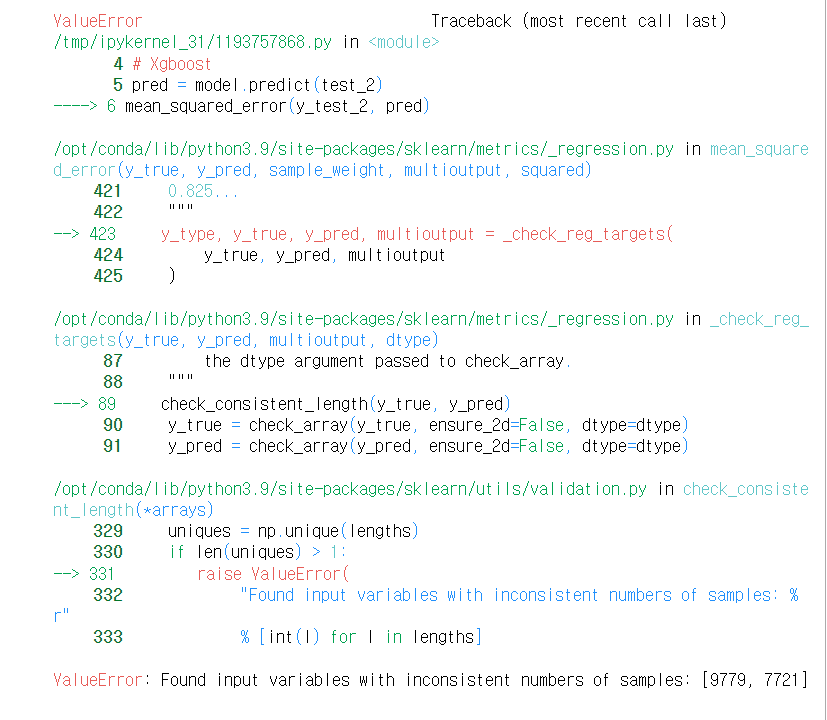

- y_test_2와 test_2의 데이터 수가 맞지 않아 발생한 오류 였다. 따라서 y_test_2의 데이터 행을 랜덤으로 삭제해 주었다

4. 오류처리 2
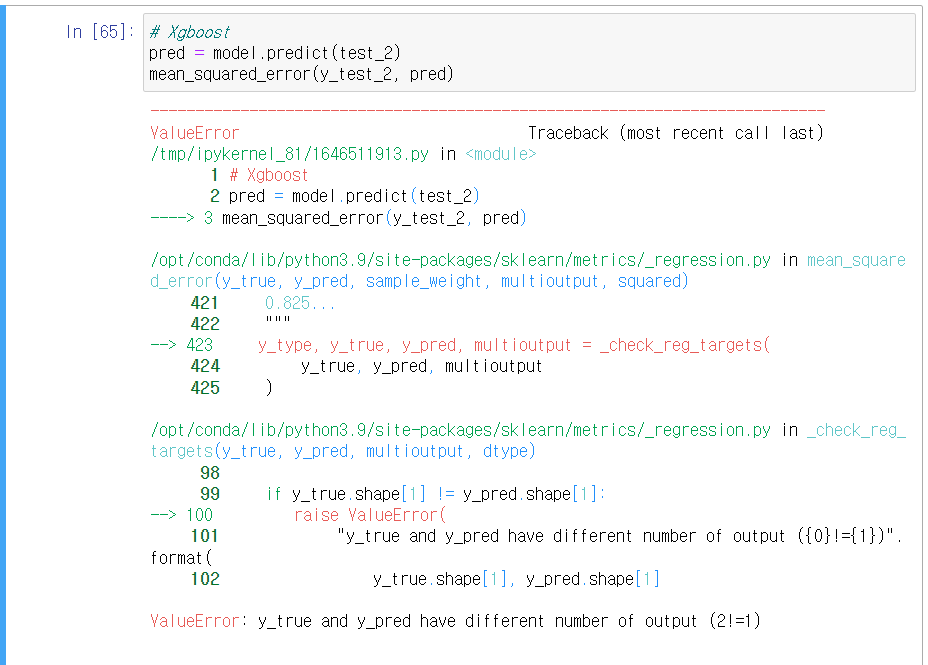
- 3번을 처리했더니 이번엔 shape이 달라서 에러가 떴다. 그런데 y_test_2, test_2가 아닌, y_true와 y_pred의 shape이 다른 것이었다.
- 위에서 데이터를 삭제하고 인덱스를 재정렬 했더니 전 인덱스가 삭제되지 않아 데이터 컬럼이 두개가 되어서 생긴 문제였다. 인덱스를 drop=’True’로 바꾸어 해결했다.

## 9. 회고 

1. 데이터 전처리 과정에서 name과 host_name, last_review/review_per_month의 관계를 보며 어떻게 할 것인가를 많이 고민했다.name과 host_name의 컬럼이 중요하지 않다고 생각을 해서 이에 대한 결측치가 적음에도 불구하고 해당 컬럼을 삭제하고 리뷰에 대한 결측치가 있는 데이터들은 결측치를 채워주거나 삭제하는 방향으로 진행했다. 
   그런데 name과 host_name을 삭제한 결과가 모델 학습 과정에서 너무 좋지 않아서 충격이었다. 하지만 예상 외로 학습한 모델을 채점 데이터에 적용해보니 성능이 나쁘지 않게 나왔다.
   반대로 last_review/review_per_month의 결측치 행들을 삭제해 준 결과가 학습 모델에서는 좋게 나왔으나 채점 데이터를 적용해보니 아주 안좋게 나왔다.
   자신의 데이터로 학습하고 테스트해 본 것과 다른 데이터에 적용하는 것은 별개의 일일 수도 있다는 것을 알게되었다.


2. 이상치를 price가 0인것만 지워줬는데 아직 이상치를 찾고 결측치에 대한 전처리를 하는 것이 능숙하지 못한 것 같아 아쉽다. 프로젝트를 시작할 때는 쉽겠다고 생각했는데 막상 해보니 꽤나 막막함을 느꼈다. 

3. 회귀 모델에 대한 프로젝트였는데, lms로 학습할 때 하는 방법을 받아들이기만 하다가 직접 적용해보니 좀 더 이해가 된 것 같아 좋았다. 또 다시 회귀 모델을 이용한 데이터 분석을 할 때는 좋은 결과를 얻을 수 있도록 해야겠다.

4. 다음에는 name,host_name 결측치 해당 행 삭제, last_review/review_per_month 칼럼 삭제의 조합으로도 다시 해 보아야겠다. 
   last_review/review_per_month의 데이터는 실제로 작성하지 않는 경우가 많아 삭제해주어도 괜찮을 것 같다.
   
5. 하이퍼 파라미터 튜닝에 대한 결과도 보고 싶었는데 시간이 촉박해서 수행해보지 못해서 너무 아쉽다. 다음에는 하이퍼 파라미터 튜닝을 했을 대와 전처리를 했을 때 어떤 것이 더 성능 향상에 효과적인지 비교해보고 싶다.

## 10. Reference

https://selfimprove39.tistory.com/entry/python-seaborn%EC%9C%BC%EB%A1%9C-HeatMap-%EA%B7%B8%EB%A6%AC%EA%B8%B0-1
https://collocationvoca.tistory.com/13
https://rfriend.tistory.com/263
https://zephyrus1111.tistory.com/49
https://rfriend.tistory.com/602
https://steadiness-193.tistory.com/252